In [2]:
pwd

'/home/wsuser/work'

In [3]:
!pip install keras==2.2.4
!pip install tensorflow

     |████████████████████████████████| 312 kB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 50 kB 12.9 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: keras 2.7.0
    Uninstalling keras-2.7.0:
      Successfully uninstalled keras-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.7.2 requires keras<2.8,>=2.7.0, but you have keras 2.2.4 which is incompatible.
     |████████████████████████████████| 1.3 MB 10.4 MB/s eta 0:00:01
  Attempting uninstall: keras
    Found existing installation: Keras 2.2.4
    Uninstalling Keras-2.2.4:
      Successfully uninstalled Keras-2.2.4


In [4]:
#Import ImageDatageneratorLibrary

from keras.preprocessing.image import ImageDataGenerator
import numpy as np #numerical analysis 
from sklearn.model_selection import train_test_split
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard
from keras.callbacks import ReduceLROnPlateau
#Dense layer is regularly deeply connected neural network layer
#MaxPooling2D to downsample the image
from keras.layers import Conv2D, Dropout, Dense, Flatten, MaxPooling2D, SeparableConv2D, Activation, BatchNormalization
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array 

In [5]:
#configure ImageDatGenerator Class 
#Define the parameters/arguments for ImageDataGenerator class
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 rotation_range=180,
                                 zoom_range=0.2,
                                 width_shift_range=0.2,
                                height_shift_range=0.2,
                                 horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='BeQLjC5kD_kVLaTooK1Et3isJunTprVRoyKUWVnoTR1B',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'naturaldisaster-donotdelete-pr-tk5kn0ujvyijoc'
object_key = 'dataset.zip'

streaming_body_1 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/


In [7]:
from io import BytesIO
import zipfile
unzip=zipfile.ZipFile(BytesIO(streaming_body_1.read()),'r')
filepaths=unzip.namelist()
for path in filepaths:
    unzip.extract(path)

In [8]:
pwd

'/home/wsuser/work'

In [9]:
#Applying ImageDataGenerator functionality to train data 

x_train =train_datagen.flow_from_directory(r"/home/wsuser/work/dataset/train_set",
                                           target_size = (64,64),
                                           batch_size=5,
                                           color_mode='rgb',
                                           class_mode='categorical')

Found 742 images belonging to 4 classes.


In [10]:
#Applying ImageDataGenerator functionality to test data 

x_test =test_datagen.flow_from_directory(r"/home/wsuser/work/dataset/test_set",
                                         target_size = (64,64), 
                                         batch_size=5,color_mode='rgb',
                                         class_mode='categorical')

Found 198 images belonging to 4 classes.


In [11]:
#initializing the model
model=Sequential()

#add convolutional, maxpooling and flatten layers
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#add Dense Layer 
model.add(Dense(units=128,activation='relu'))
model.add(Dense(units=4,activation='softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [13]:
#configure the learning process
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [14]:
x_test.class_indices

{'Cyclone': 0, 'Earthquake': 1, 'Flood': 2, 'Wildfire': 3}

In [15]:
#Training the model
history = model.fit(x_train,epochs=30,
                    steps_per_epoch=len(x_train),
                    validation_data=x_test,validation_steps=len(x_test))

Epoch 1/30
149/149 [==============================] - 41s 268ms/step - loss: 1.2954 - accuracy: 0.3679 - val_loss: 1.3257 - val_accuracy: 0.3838
Epoch 2/30
149/149 [==============================] - 40s 267ms/step - loss: 1.1785 - accuracy: 0.4218 - val_loss: 1.1798 - val_accuracy: 0.4040
Epoch 3/30
149/149 [==============================] - 39s 263ms/step - loss: 1.1405 - accuracy: 0.4825 - val_loss: 1.0958 - val_accuracy: 0.4949
Epoch 4/30
149/149 [==============================] - 40s 268ms/step - loss: 1.0856 - accuracy: 0.5337 - val_loss: 0.9681 - val_accuracy: 0.7323
Epoch 5/30
149/149 [==============================] - 39s 260ms/step - loss: 1.0058 - accuracy: 0.6011 - val_loss: 1.0177 - val_accuracy: 0.5354
Epoch 6/30
149/149 [==============================] - 41s 276ms/step - loss: 0.9046 - accuracy: 0.6173 - val_loss: 0.8495 - val_accuracy: 0.7121
Epoch 7/30
149/149 [==============================] - 40s 268ms/step - loss: 0.7864 - accuracy: 0.6765 - val_loss: 0.8137 - val_ac

In [16]:
#save the model
model.save('disaster.h5')
model_json = model.to_json()
with open("model-bw.json", "w") as json_file:
    json_file.write(model_json)

In [26]:
!tar -zcvf disaster.tgz disaster.h5

disaster.h5


In [20]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 13.3 MB/s eta 0:00:01


In [27]:
from ibm_watson_machine_learning import APIClient
wml_credentials={
    "url":'https://us-south.ml.cloud.ibm.com',
    "apikey":'wrWJKcS_-bKdJ7LajFGsaxu9Sk2nCDDuMZcdUUP6p2iD'
}
client=APIClient(wml_credentials)

In [28]:
def guid_from_space_name(client,space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']['name']==space_name)['metadata']['id'])
                              
                              
space_uid=guid_from_space_name(client,'disaster')
client.set.default_space(space_uid)

'SUCCESS'

In [29]:
software_spec_uid=client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
                              


In [30]:
model_details=client.repository.store_model(model='disaster.tgz',meta_props={
                                             client.repository.ModelMetaNames.NAME:"Natural Disaster",
                                             client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
                                             client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid 
                                             }
                                           )
model_id=client.repository.get_model_id(model_details)  

In [31]:
model_id

'c3820a6b-fd74-48cd-8b0c-70d4ffe1c440'

In [32]:

#load the saved model
model = load_model("disaster.h5")

In [37]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='BeQLjC5kD_kVLaTooK1Et3isJunTprVRoyKUWVnoTR1B',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'naturaldisaster-donotdelete-pr-tk5kn0ujvyijoc'
object_key = '1.jpg'

streaming_body_3 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/

In [ ]:
img=load_img(streaming_body_3,target_size=(64,64))

In [14]:
#load image
x=img_to_array(img)
x=np.expand_dims(x,axis=0)
index=['Cyclone','Earthquake','Flood','Wildfire']

#predict class 
y=np.argmax(model.predict(x),axis=1)
print(index[int(y)])

1/1 [==============================] - 0s 136ms/step
Earthquake


Text(0.5, 1.0, 'Training and validation loss')

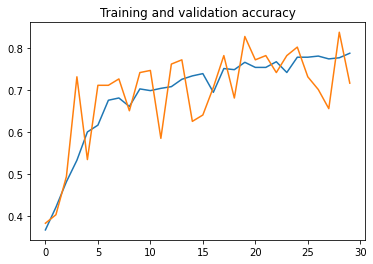

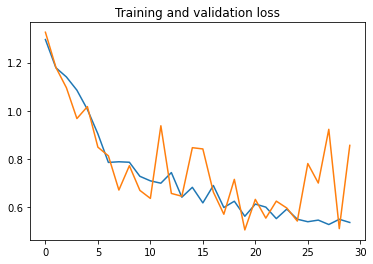

In [36]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')